# <center><font color='blue'>Análise Exploratória do Mercado de Programação dos EUA</font></center>

### <ul> <center> Pesquisa salarial foi realizada no site: </center> <br> <li> https://www.freecodecamp.org/ </li> <br> <li> O repositório da base de dados que foi coletada para a análise: <br>  <ol start=2016> <li> https://raw.githubusercontent.com/freeCodeCamp/2016-new-coder-survey/master/clean-data/2016-FCC-New-Coders-Survey-Data.csv </li> <li> https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv </li> </ol> </li> </ul>



### Importando pacotes

In [16]:
import numpy
import matplotlib.pyplot as plot
import pandas
import os
%matplotlib inline

#from collections import Iterable, Counter
#def flatten(l):
#    for el in l:
#        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
#            yield from flatten(el)
#        else:
#            yield el.strip()

### Listando arquivos

In [2]:
display(os.listdir('base_dados_pesquisa'), next(os.walk('base_dados_pesquisa')))

['2016-FCC-New-Coders-Survey-Data.csv', '2017-fCC-New-Coders-Survey-Data.csv']

('base_dados_pesquisa',
 [],
 ['2016-FCC-New-Coders-Survey-Data.csv',
  '2017-fCC-New-Coders-Survey-Data.csv'])

### Função retorna todos os arquivos num determinado diretório

In [3]:
def arquivosDiretorio(raiz, subPastas=True, extensao='.csv'):
    return [os.path.join(diretorioRaiz, arquivo) for diretorioRaiz, diretorios, arquivos in (os.walk(raiz) if subPastas else [next(os.walk(raiz))]) for arquivo in arquivos if arquivo.endswith(extensao)]

In [4]:
arquivosBackup = arquivosDiretorio('base_dados_pesquisa')

### Carregar dados iniciais

In [5]:
dados = [pandas.read_csv(arquivo, low_memory=False) for arquivo in arquivosBackup]

### Mostrar dados iniciais em tabela

In [6]:
[display(dado.head()) for dado in dados]

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[None, None]

### Mostrar resumo estatístico em tabela

In [7]:
[display(dado.describe()) for dado in dados]

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CodeEventBootcamp,...,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,13613.000000,15380.000000,933.000000,635.000000,934.000000,631.000000,330.000000,937.000000,2549.000000,42.0,...,29.0,36.0,30.0,191.0,422.0,3306.0,4130.0,121.0,121.0,3438.000000
mean,29.175421,0.061964,0.689175,0.584252,0.332976,9.055468,63740.506061,0.785486,1.899961,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33489.955207
std,9.017716,0.241097,0.463080,0.493239,0.471531,12.968035,26347.200265,0.410704,1.113900,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38173.579783
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1000.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,3.000000,50000.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10000.000000
50%,27.000000,0.000000,1.000000,1.000000,0.000000,6.000000,60000.000000,1.000000,2.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22000.000000
75%,33.000000,0.000000,1.000000,1.000000,1.000000,12.000000,77000.000000,1.000000,2.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40000.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,220.000000,200000.000000,1.000000,18.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,500000.000000


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


[None, None]

### Mostrar dimensão e quantidade de dados

In [8]:
[display(dado.shape, len(dado)) for dado in dados]

(15620, 113)

15620

(18175, 136)

18175

[None, None]

### Mostrar colunas

In [9]:
[display(dado.columns) for dado in dados]

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampFullJobAfter',
       'BootcampLoanYesNo', 'BootcampMonthsAgo', 'BootcampName',
       'BootcampPostSalary', 'BootcampRecommend', 'ChildrenNumber',
       ...
       'ResourceSoloLearn', 'ResourceStackOverflow', 'ResourceTreehouse',
       'ResourceUdacity', 'ResourceUdemy', 'ResourceW3Schools',
       'ResourceYouTube', 'SchoolDegree', 'SchoolMajor', 'StudentDebtOwe'],
      dtype='object', length=113)

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

[None, None]

### Distribuição por idade (histograma)

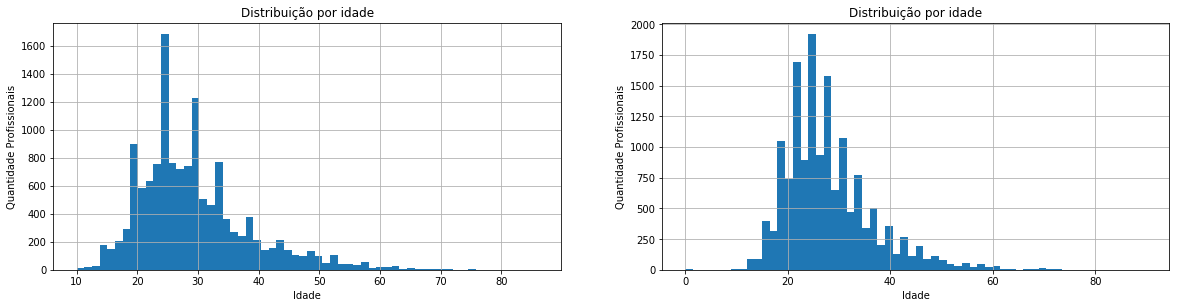

In [10]:
for indice, dado in enumerate(dados, start=1):
    plot.subplot(len(dados), 2, indice, title='Distribuição por idade', xlabel='Idade', ylabel ='Quantidade Profissionais')
    dado.Age.hist(bins=60, figsize=(20, 10))
plot.show()

### Distribuição por sexo (pizza)

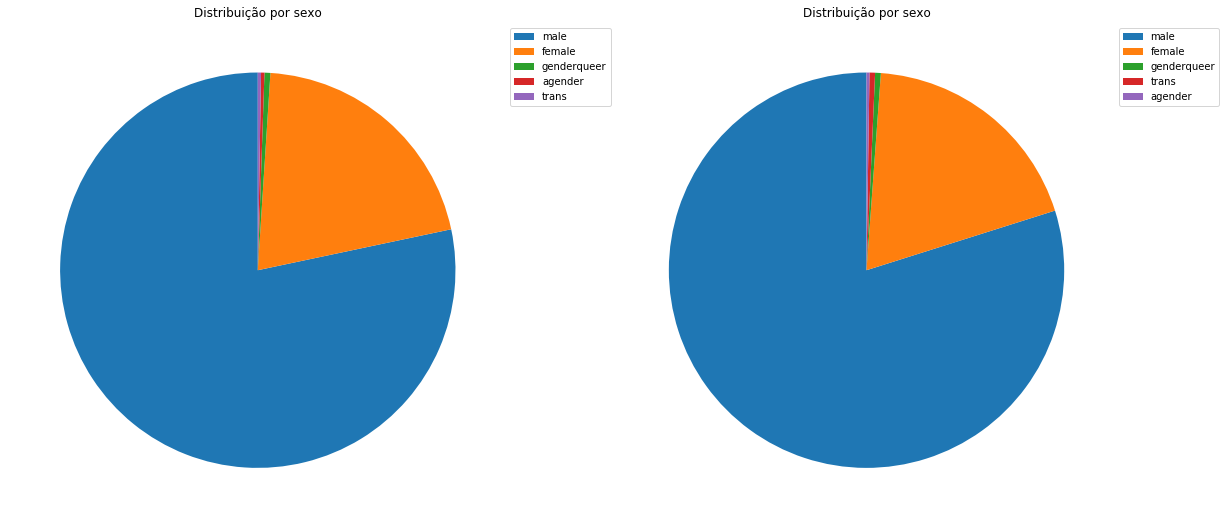

In [11]:
for indice, dado in enumerate(dados, start=1):
    sexosContados = dado.Gender.value_counts() #dado.Gender.dropna().unique()
    plot.subplot(len(dados), 2, indice, aspect='equal', title='Distribuição por sexo')
    sexosContados.plot.pie(startangle=90, figsize=(20, 20), labels=None, label='')
    plot.legend(bbox_to_anchor=(1, 1), labels=sexosContados.index)
plot.show()

### Distribuição por interesses de trabalho (pizza)

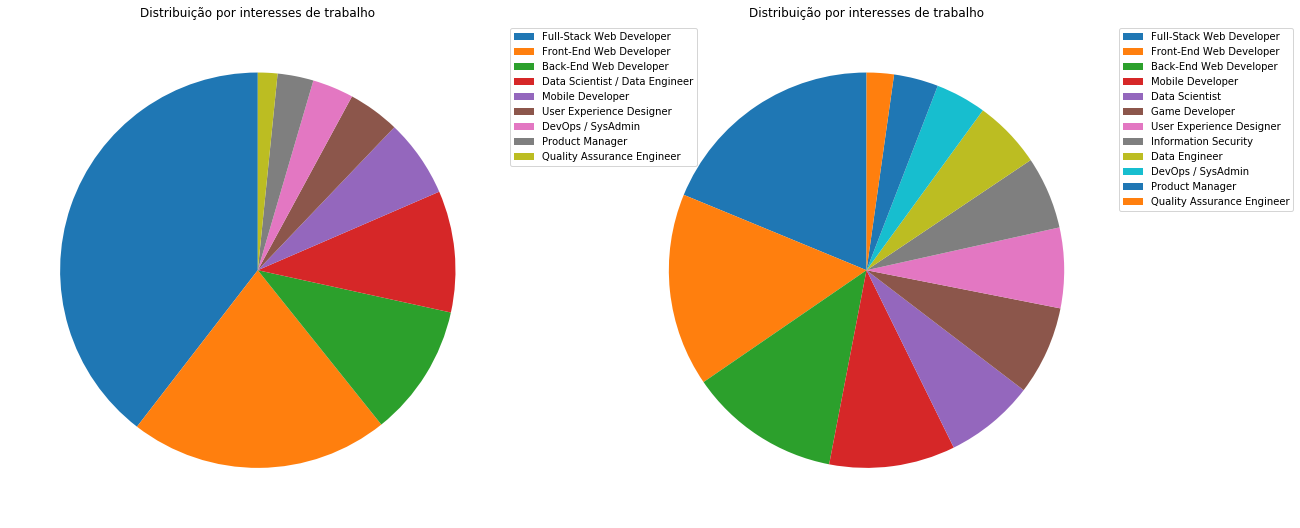

In [12]:
plot.figure(figsize=(20, 20))
for indice, dado in enumerate(dados, start=1):
    quantidadeMaxima = 12
    plot.subplot(len(dados), 2, indice, aspect='equal', title='Distribuição por interesses de trabalho')
    if(len(dado.JobRoleInterest.value_counts().index) < quantidadeMaxima):
        interessesContados = dado.JobRoleInterest.str.strip().value_counts()
        interessesContados.plot.pie(startangle=90, labels=None, label='')
        plot.legend(bbox_to_anchor=(1, 1), labels=interessesContados.index)
    else:
        dadosFormatados = pandas.Series(numpy.char.strip(numpy.concatenate(dado.JobRoleInterest.dropna().str.split(',').values)))
        #Counter(list(flatten(dado.JobRoleInterest.dropna().str.split(','))))
        interessesContados = dadosFormatados.value_counts()[:quantidadeMaxima]
        interessesContados.plot.pie(startangle=90, labels=None, label='')
        plot.legend(bbox_to_anchor=(1, 1), labels=interessesContados.index)
plot.show()

### Distribuição por emprego (pizza)

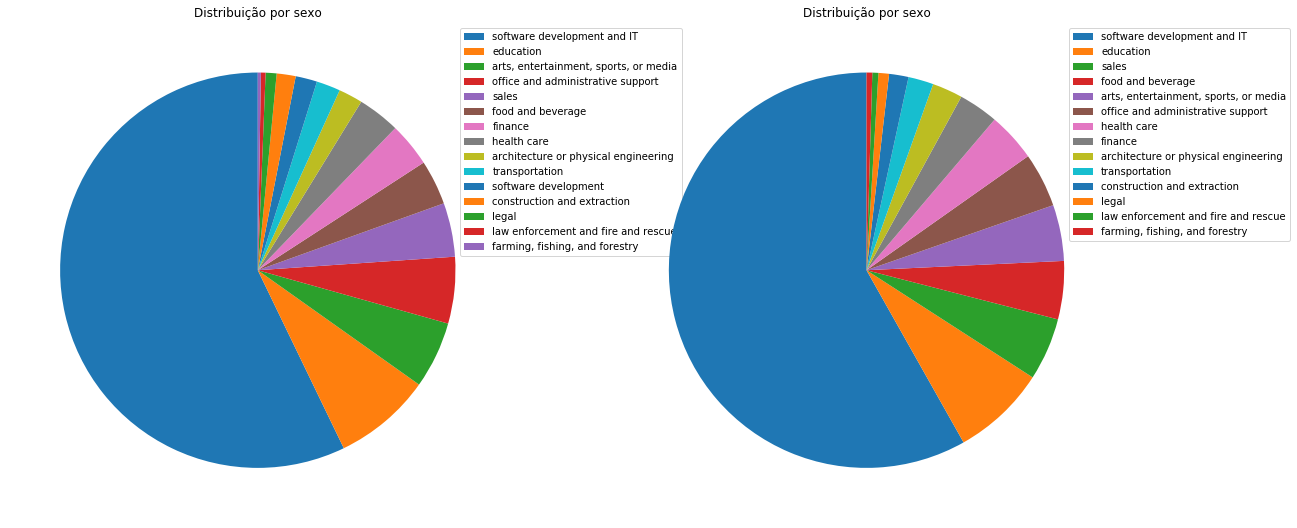

In [13]:
for indice, dado in enumerate(dados, start=1):
    empregosContados = dado.EmploymentField.value_counts()
    plot.subplot(len(dados), 2, indice, aspect='equal', title='Distribuição por sexo')
    empregosContados.plot.pie(startangle=90, figsize=(20, 20), labels=None, label='')
    plot.legend(bbox_to_anchor=(0.9, 1), labels=empregosContados.index)
plot.show()

### Distribuição por preferências de trabalho por idade (barra)

C:\Users\Rangel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


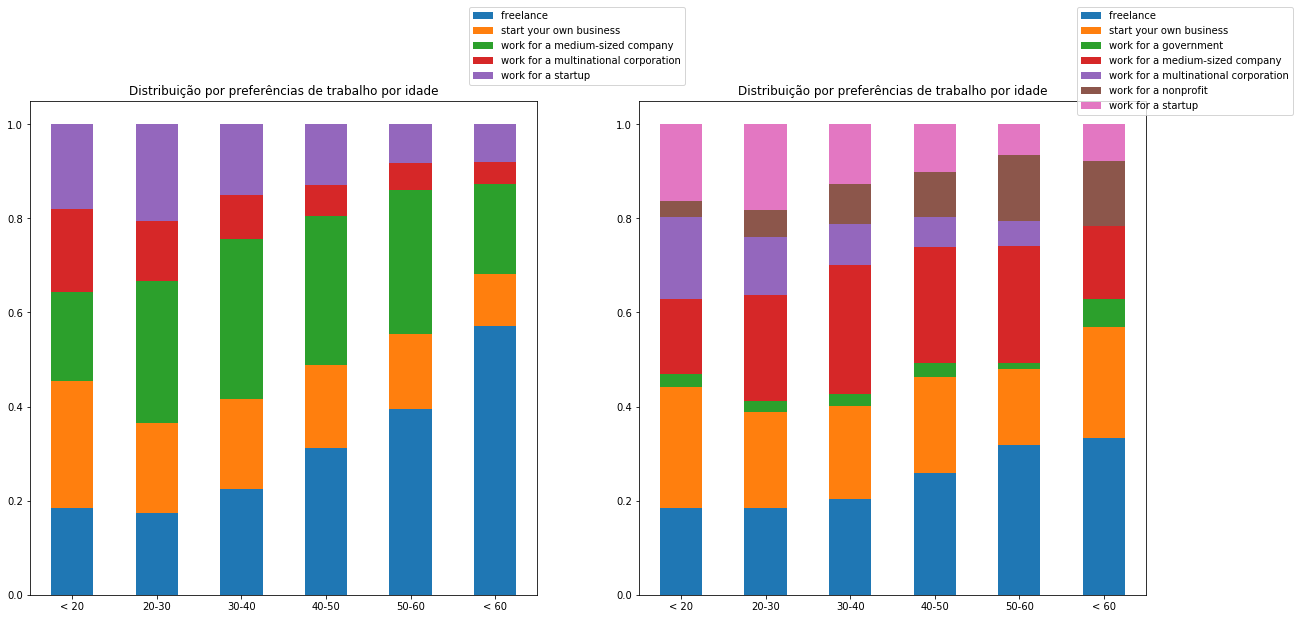

In [14]:
copiaDados = dados.copy()
for indice, dado in enumerate(copiaDados, start=1):
    dado.AgeRanges = pandas.cut(dado.Age, [0, 20, 30, 40, 50, 60, 100], labels=['< 20', '20-30', '30-40', '40-50', '50-60', '< 60'])
    tabelaCruzada = pandas.crosstab(dado.AgeRanges, dado.JobPref).apply(lambda x : x/x.sum(), axis=1)
    subGrafico = plot.subplot(len(copiaDados), 2, indice, title='Distribuição por preferências de trabalho por idade')
    tabelaCruzada.plot.bar(stacked=True, ax=subGrafico, figsize=(20, 20))
    plot.legend(bbox_to_anchor=(1.3, 1.2))
    plot.xticks(rotation='horizontal')
    plot.xlabel('')
plot.show()

### Distribuição por realocação de trabalho por idade (barra)

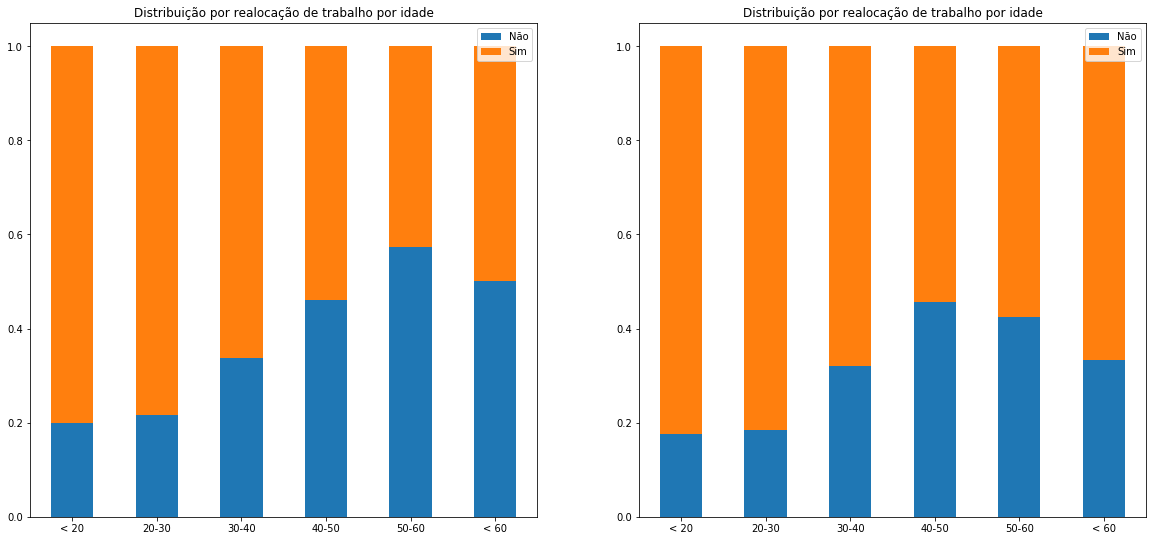

In [19]:
for indice, dado in enumerate(copiaDados, start=1):
    tabelaCruzada = pandas.crosstab(dado.AgeRanges, dado.JobRelocateYesNo).apply(lambda x : x/x.sum(), axis=1)
    subGrafico = plot.subplot(len(copiaDados), 2, indice, title='Distribuição por realocação de trabalho por idade')
    tabelaCruzada.plot.bar(stacked=True, ax=subGrafico, figsize=(20, 20))
    plot.legend(labels=['Não', 'Sim'], loc='best')
    plot.xticks(rotation='horizontal')
    plot.xlabel('')
plot.show()

### Distribuição por idade x horas de aprendizagem (linha de regressão)

C:\Users\Rangel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


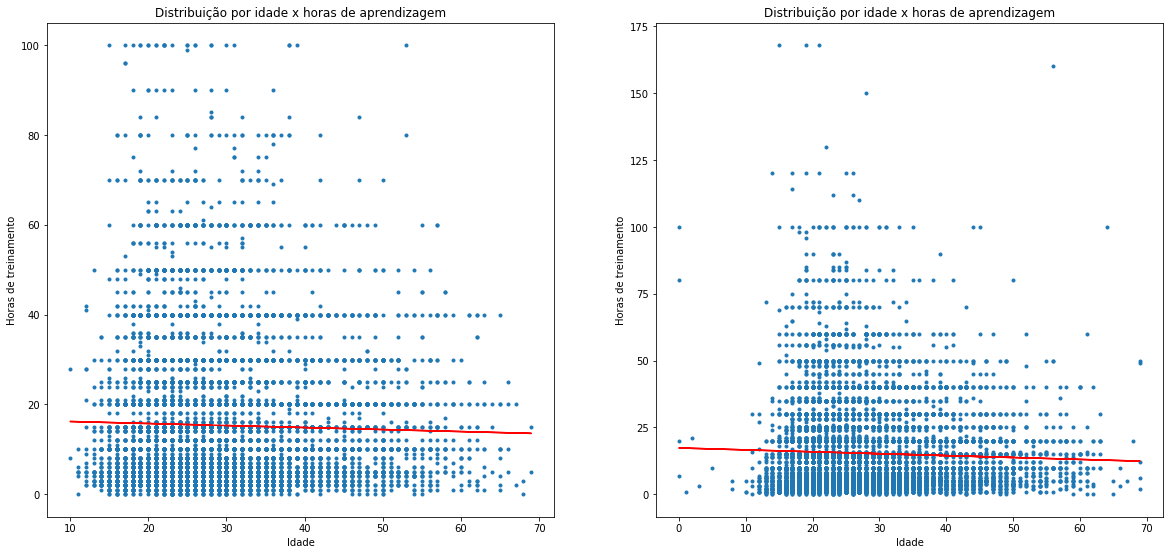

In [16]:
copiaDados2 = dados.copy()
plot.figure(figsize=(20, 20))
for indice, dado in enumerate(copiaDados2, start=1):
    dado = dado.dropna(subset=['HoursLearning'])
    dado = dado[dados[indice-1].Age.isin(range(0,70))]
    x = dado.Age
    y = dado.HoursLearning
    m, n = numpy.polyfit(x,y,1)
    plot.subplot(len(copiaDados2), 2, indice, title='Distribuição por idade x horas de aprendizagem')
    plot.plot(x,y,'.')
    plot.plot(x,m*x+n,'-', color='red')
    plot.xlabel('Idade')
    plot.ylabel('Horas de treinamento')
plot.show()

### Distribuição por investimento em capacitação x expectativa salarial (linha de regressão)

C:\Users\Rangel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


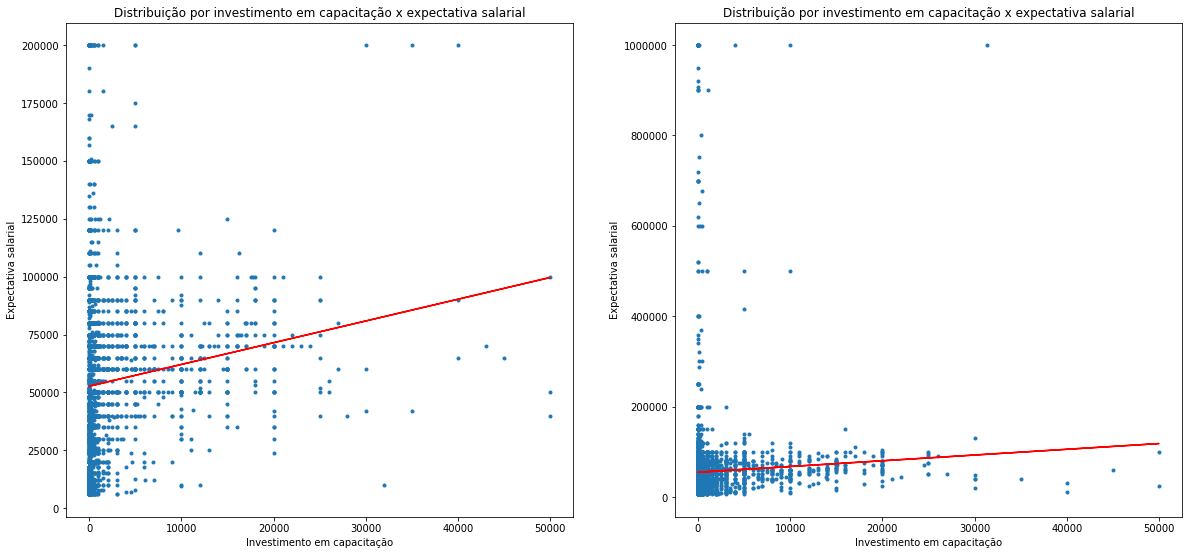

In [17]:
copiaDados3 = dados.copy()
plot.figure(figsize=(20, 20))
for indice, dado in enumerate(copiaDados3, start=1):
    dado = dado.dropna(subset=['ExpectedEarning'])
    dado = dado[dados[indice-1].MoneyForLearning.isin(range(0,60000))]
    x = dado.MoneyForLearning
    y = dado.ExpectedEarning
    m, n = numpy.polyfit(x,y,1)
    plot.subplot(len(copiaDados3), 2, indice, title='Distribuição por investimento em capacitação x expectativa salarial')
    plot.plot(x,y,'.')
    plot.plot(x,m*x+n,'-', color='red')
    plot.xlabel('Investimento em capacitação')
    plot.ylabel('Expectativa salarial')
plot.show()